# Pandas Built-in Data Visualization

For more information on the following topics visit https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html<br>
For a nice graphic showing the anatomy of a figure with terminology, visit https://matplotlib.org/faq/usage_faq.html

## Imports

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

## The Data

There are some fake data csv files you can read in as dataframes:

In [5]:
df1 = pd.read_csv('data/df1.csv', index_col=0)
df2 = pd.read_csv('data/df2.csv')

# Plot Types

There are several plot types built into pandas; most of them are statistical by nature:

<pre>
df.plot.hist()     histogram
df.plot.bar()      bar chart
df.plot.barh()     horizontal bar chart
df.plot.line()     line chart
df.plot.area()     area chart
df.plot.scatter()  scatter plot
df.plot.box()      box plot
df.plot.kde()      kde plot
df.plot.hexbin()   hexagonal bin plot
df.plot.pie()      pie chart</pre>

You can also call specific plots by passing their name as an argument, as with `df.plot(kind='area')`.

Let's start going through them! First we'll look at the data:

In [6]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [7]:
df2.head()

,a,b,c,d,e
0,0.039762,0.218517,0.103423,0.957904,x
1,0.937288,0.041567,0.899125,0.977680,y
2,0.780504,0.008948,0.557808,0.797510,x
3,0.672717,0.247870,0.264071,0.444358,z
4,0.053829,0.520124,0.552264,0.190008,y


___
## Histograms
This is one of the most commonly used plots. Histograms describe the distribution of continuous data by dividing the data into "bins" of equal width, and plotting the number of values that fall into each bin. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html'>[reference]</a>

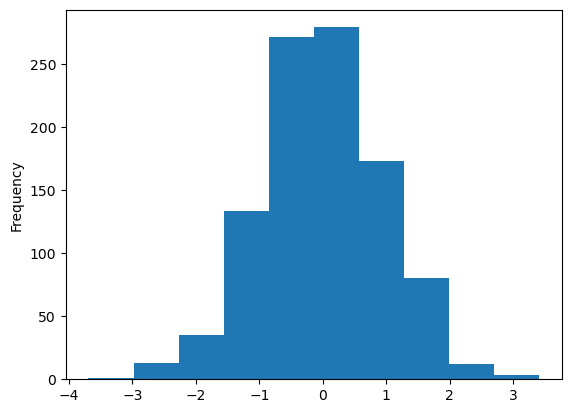

In [8]:
df1['A'].plot.hist();

We can add settings to do things like bring the x- and y-axis values to the edge of the graph, and insert lines between vertical bins:

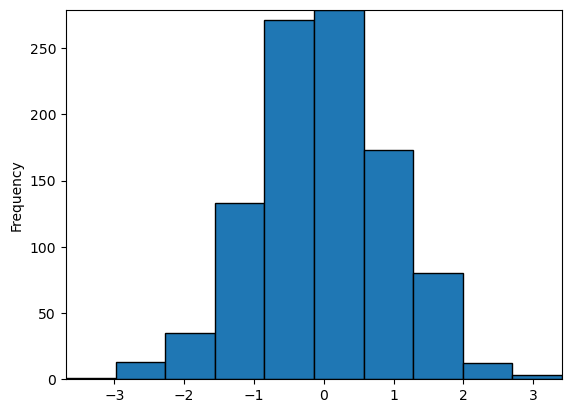

In [9]:
df1['A'].plot.hist(edgecolor='k').autoscale(enable=True, axis='both', tight=True)

You can use any [matplotlib color spec](https://matplotlib.org/api/colors_api.html) for **edgecolor**, such as `'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'`, or the string representation of a float value for shades of grey, such as `'0.5'`

For **autoscale** the axis can be set to `'x'`, `'y'` or `'both'`

We can also change the number of bins (the range of values over which frequencies are calculated) from the default value of 10:

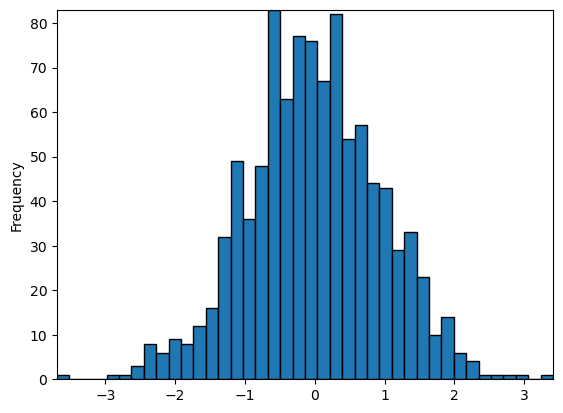

In [10]:
df1['A'].plot.hist(bins=40, edgecolor='k').autoscale(enable=True, axis='both', tight=True)

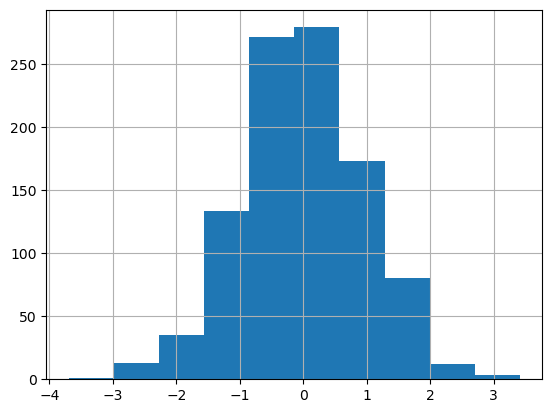

In [11]:
df1['A'].hist();

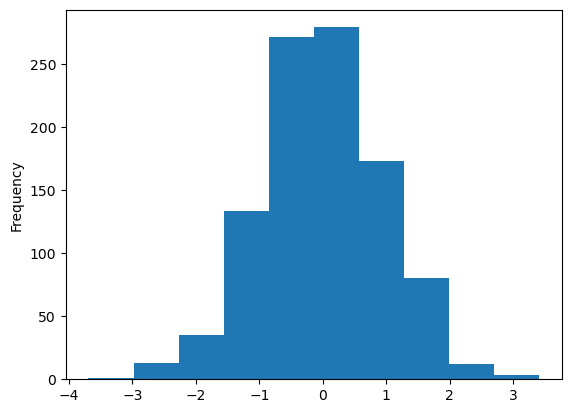

In [12]:
df1['A'].hist(grid=False).set_ylabel("Frequency");

For more on using <tt>df.hist()</tt> visit https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html

___
## Barplots
Barplots are similar to histograms, except that they deal with discrete data, and often reflect multiple variables. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html'>[reference]</a>

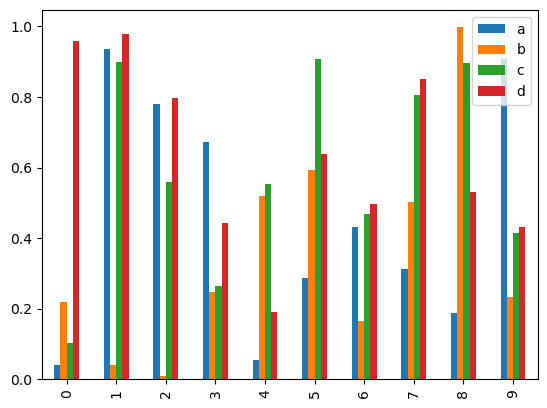

In [13]:
df2.plot.bar();

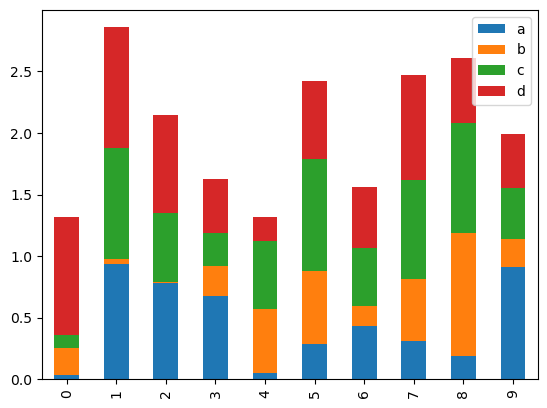

In [14]:
df2.plot.bar(stacked=True);

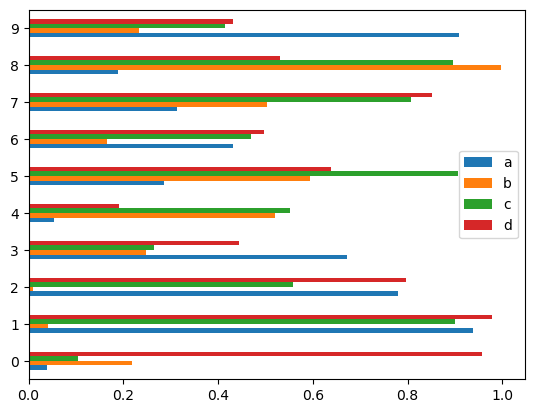

In [15]:
# USE .barh() TO DISPLAY A HORIZONTAL BAR PLOT
df2.plot.barh();

___
## Line Plots
Line plots are used to compare two or more variables. By default the x-axis values are taken from the index. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.line.html'>[reference]</a>

Line plots happen to be the default pandas plot. They are accessible through <tt>df.plot()</tt> as well as <tt>df.plot.line()</tt>

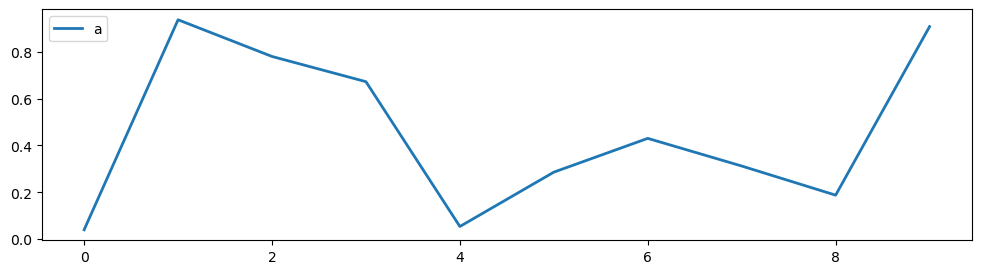

In [16]:
df2.plot.line(y='a',figsize=(12,3),lw=2);

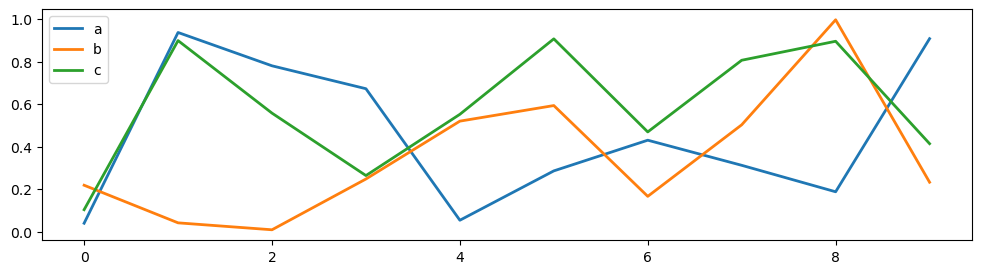

In [17]:
df2.plot.line(y=['a','b','c'],figsize=(12,3),lw=2);

___
## Area Plots
Area plots represent cumulatively stacked line plots where the space between lines is emphasized with colors. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.area.html'>[reference]</a>

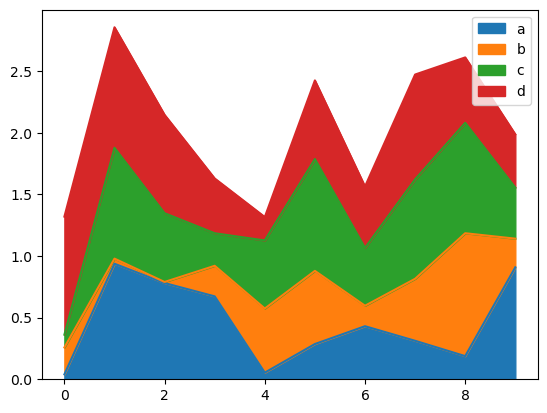

In [18]:
df2.plot.area();

It often helps to mute the colors by passing an <strong>alpha</strong> transparency value between 0 and 1.

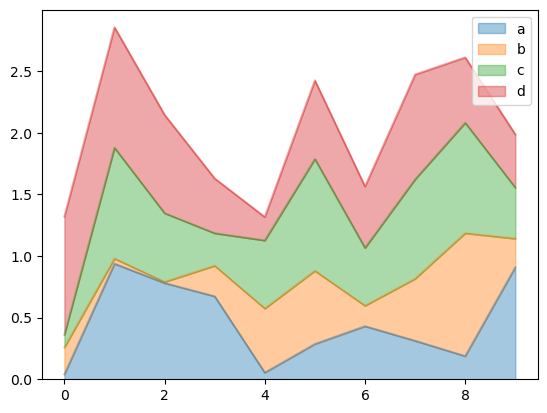

In [19]:
df2.plot.area(alpha=0.4);

To produce a blended area plot, pass a <strong>stacked=False</strong> argument:

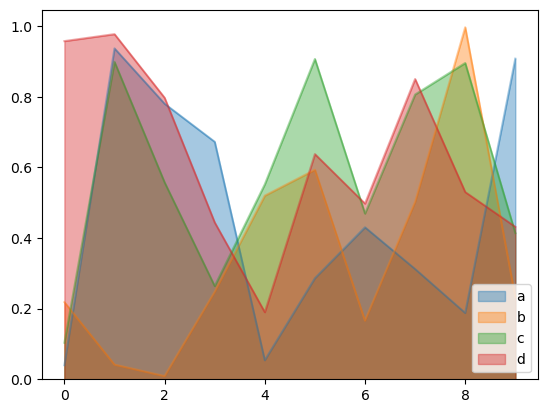

In [20]:
df2.plot.area(stacked=False, alpha=0.4);

## Scatter Plots
Scatter plots are a useful tool to quickly compare two variables, and to look for possible trends. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html'>[reference]</a>

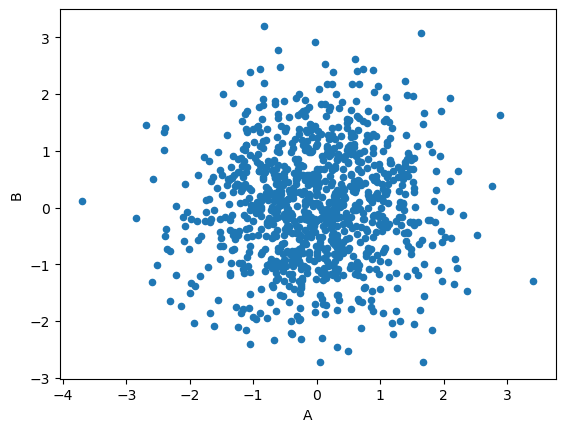

In [21]:
df1.plot.scatter(x='A',y='B');

### Scatter plots with colormaps
You can use <strong>c</strong> to color each marker based off another column value. Use `cmap` to indicate which colormap to use.<br>
For all the available colormaps, check out: http://matplotlib.org/users/colormaps.html

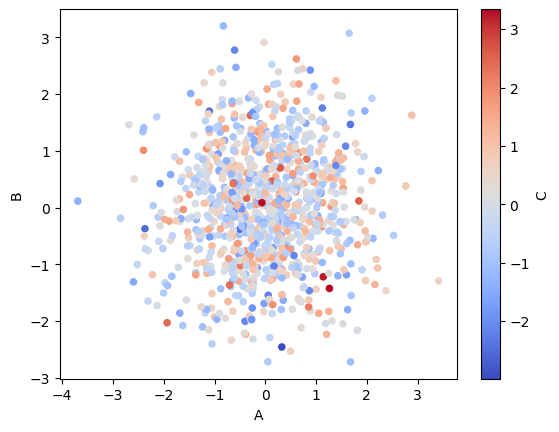

In [22]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm');

### Scatter plots with sized markers
Alternatively you can use <strong>s</strong> to indicate marker size based off another column. The <strong>s</strong> parameter needs to be an array, not just the name of a column:

c:\Users\zpulliam\Anaconda3\envs\ds\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


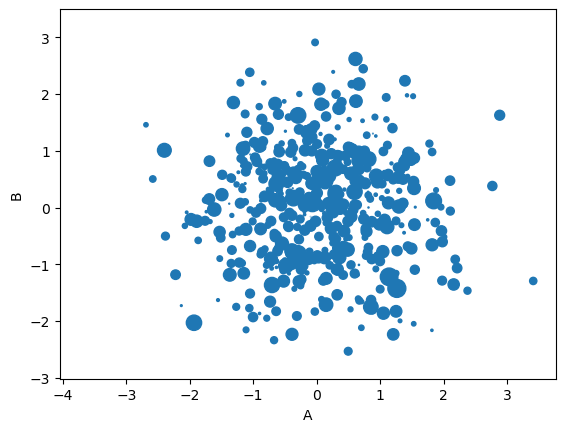

In [24]:
df1.plot.scatter(x='A',y='B',s=df1['C']*50);

The warning above appeared because some `df1['C']` values are negative. We can fix this finding the minimum value, writing a function that adds to each value, and applying our function to the data with <strong>.apply(func)</strong>.

Also, these data points have a lot of overlap. We can address this issue by passing in an <strong>alpha</strong> blending value between 0 and 1 to make markers more transparent.

In [25]:
df1['C'].min()

-2.987971138961773

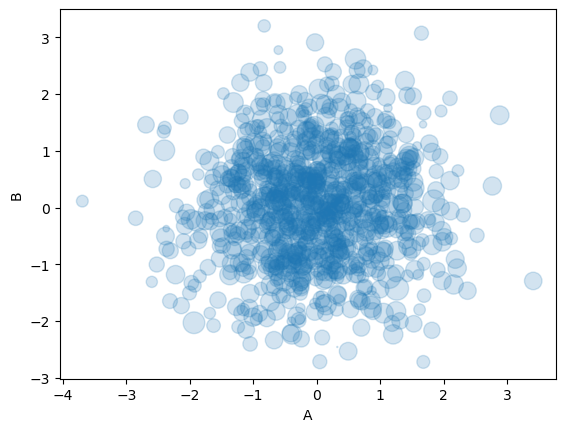

In [26]:
def add_three(val):
    return val+3

df1.plot.scatter(x='A',y='B',s=df1['C'].apply(add_three)*45, alpha=0.2);

Let's see what this looks like with our smaller dataset. Here we'll also apply .autoscale() to tighten the axes.

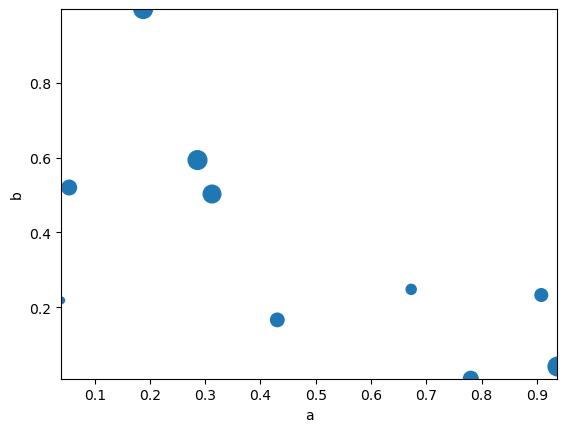

In [27]:
df2.plot.scatter(x='a',y='b',s=df2['c']*200).autoscale(enable=True, axis='both', tight=True);

___
## BoxPlots
Box plots, aka "box and whisker diagrams", describe the distribution of data by dividing data into <em>quartiles</em> about the mean.<br>
Look <a href='https://en.wikipedia.org/wiki/Box_plot'>here</a> for a description of boxplots. <a href='https://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots'>[reference]</a>

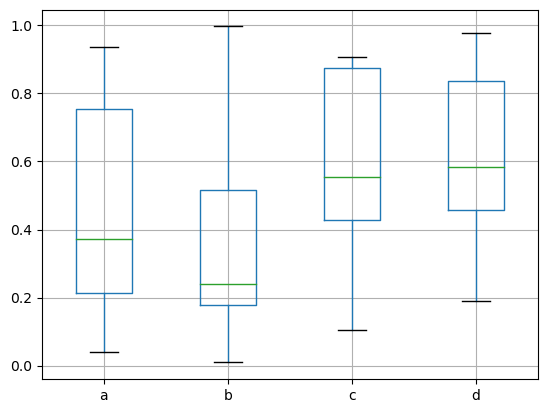

In [28]:
df2.boxplot();

### Boxplots with Groupby
To draw boxplots based on groups, first pass in a list of columns you want plotted (including the groupby column), then pass <strong>by='columname'</strong> into <tt>.boxplot()</tt>. Here we'll group records by the <strong>'e'</strong> column, and draw boxplots for the <strong>'b'</strong> column.

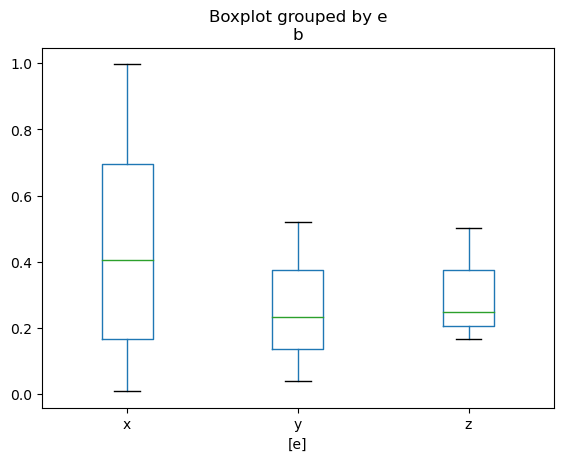

In [29]:
df2[['b','e']].boxplot(by='e', grid=False);

In the next section on Customizing Plots we'll show how to change the title and axis labels.

___
## Kernel Density Estimation (KDE) Plot
These plots are accessible either through <tt>df.plot.kde()</tt> or <tt>df.plot.density()</tt> <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.kde.html'>[reference]</a>

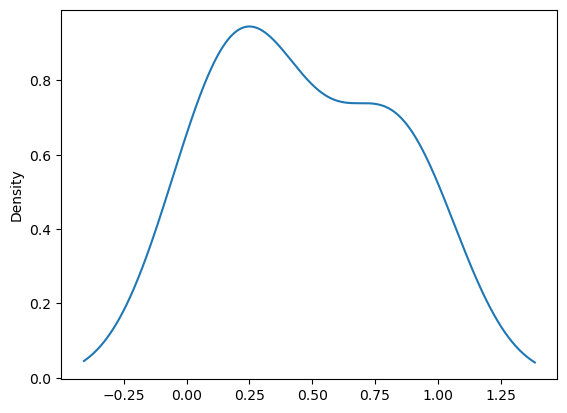

In [30]:
df2['a'].plot.kde();

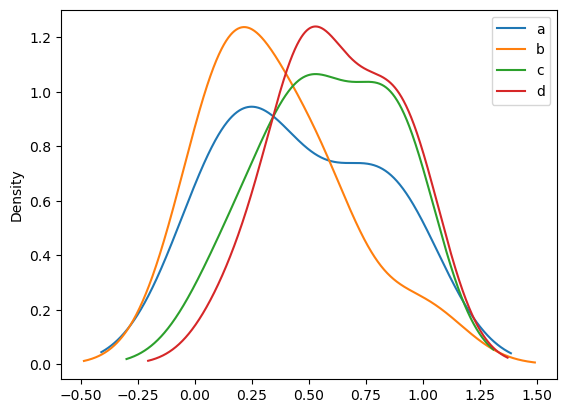

In [31]:
df2.plot.density();

___
## Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html'>[reference]</a>

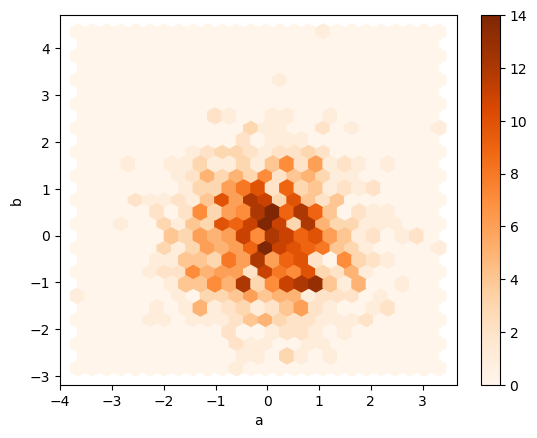

In [32]:
# FIRST CREATE A DATAFRAME OF RANDOM VALUES
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

# MAKE A HEXAGONAL BIN PLOT
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges');